In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Passengers')

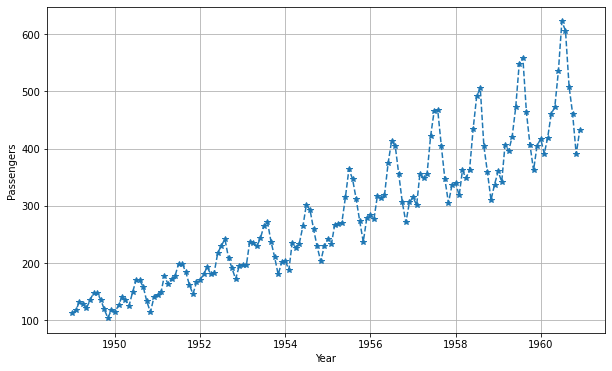

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace = True)
plt.figure(figsize = (10, 6))
plt.plot(df.index, df.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.isnull().values.any()

False

In [6]:
df_copy = df.copy()
rows = df_copy.sample(frac = 0.1, random_state = 0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [7]:
df_copy_ffill = df_copy.fillna(method = 'ffill') #forward fill
df_copy_bfill = df_copy.fillna(method = 'bfill') #backward fill
df_copy_LIF = df_copy.interpolate(method = 'linear', limit_direction = 'forward')
df_copy_LIB = df_copy.interpolate(method = 'linear', limit_dierction = 'backward')

In [8]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

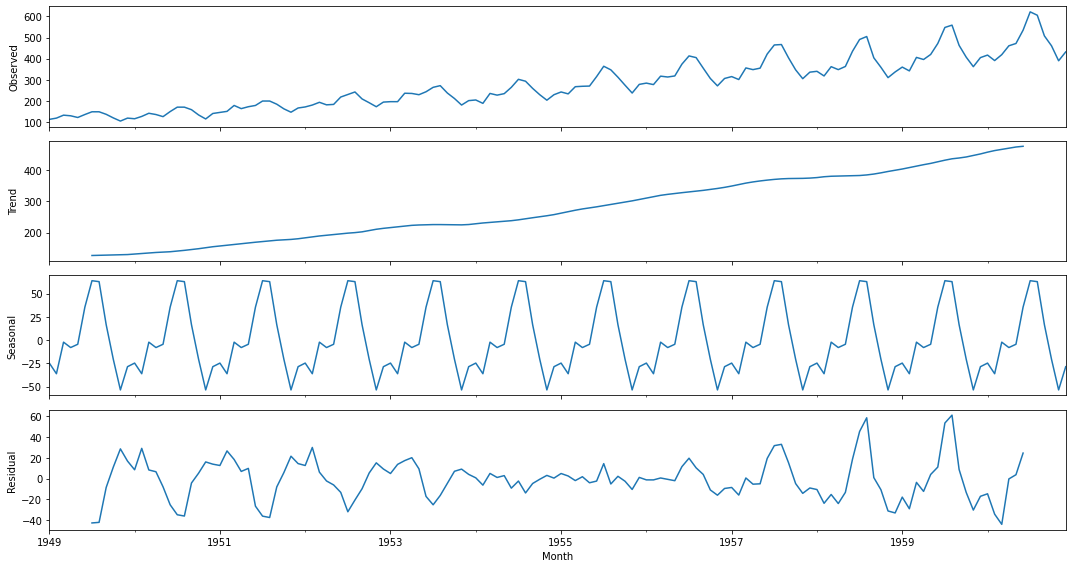

In [9]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8;
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive');
decompose_series.plot();
plt.show();

In [10]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[2]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'  {k}: {v}')

ADF Statistic: 13
p-value: 0.9918802434376409
No. of lags used: 13
No. of observations used: 130
Critical Values:
  1%: -3.4816817173418295
  5%: -2.8840418343195267
  10%: -2.578770059171598


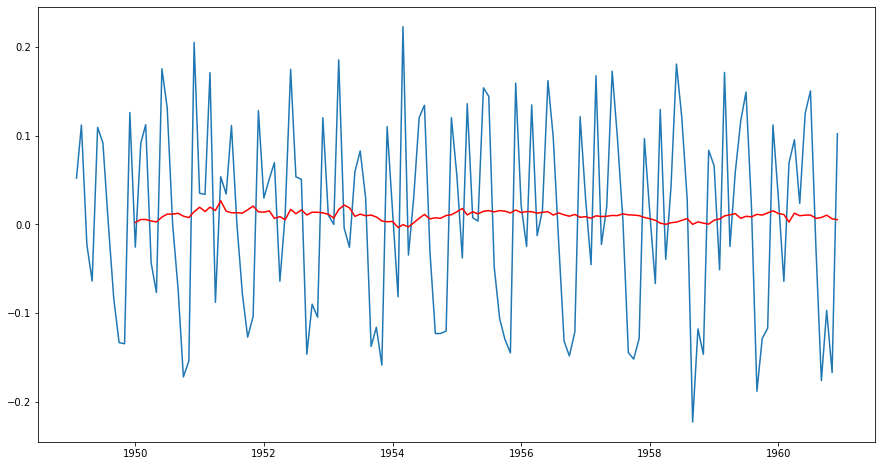

In [11]:
#remove seasonality and trend
df_log = np.log(df)
df_diff = df_log.diff(periods = 1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color = 'red')


In [12]:
df_quarterly = df.resample('3M').mean() #downsample to quarterly data points
df_daily = df.resample('D').mean() #upsample to daily data points

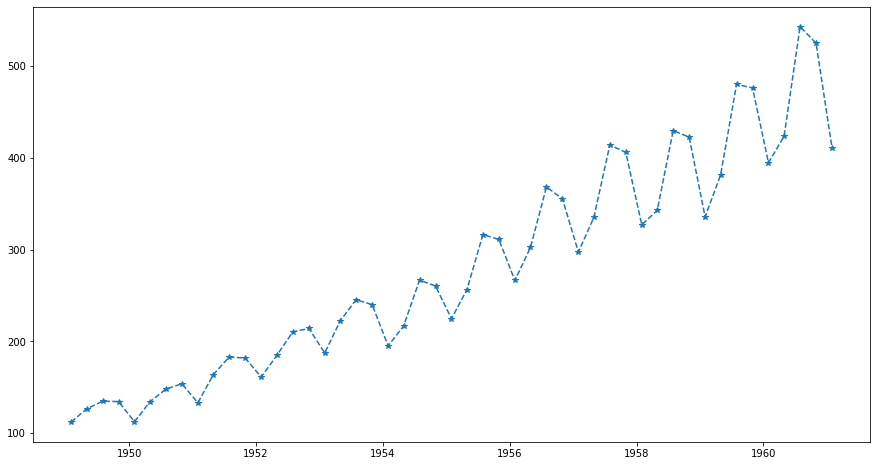

In [13]:
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--', marker = '*')

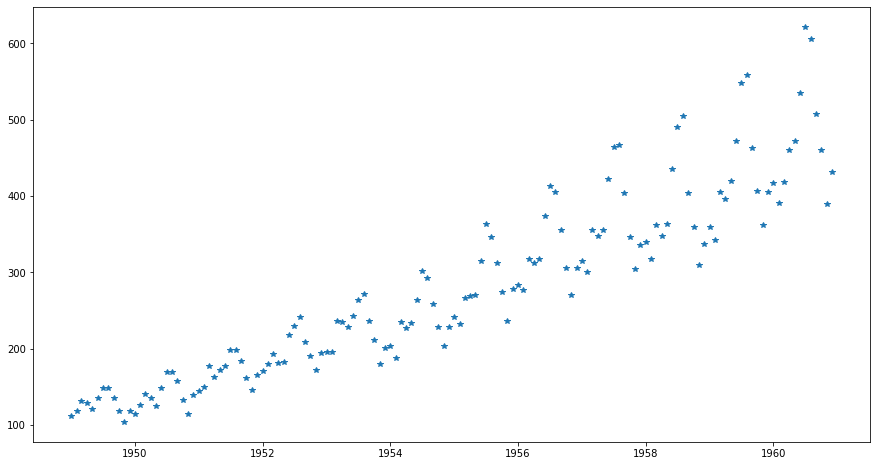

In [14]:
plt.plot(df_daily.index, df_daily.Passengers, '--', marker = '*')

In [15]:
df_diff.dropna(inplace = True)
#df_diff = df_diff.fillna(method='bfill')

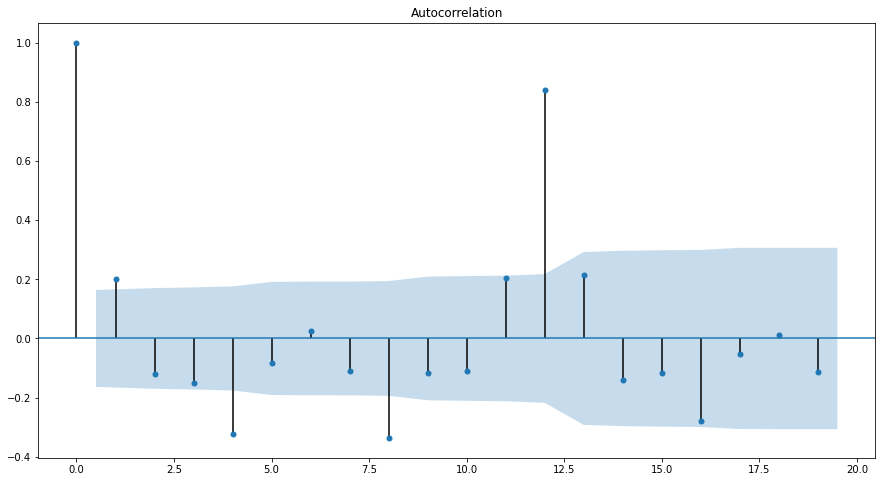

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show()

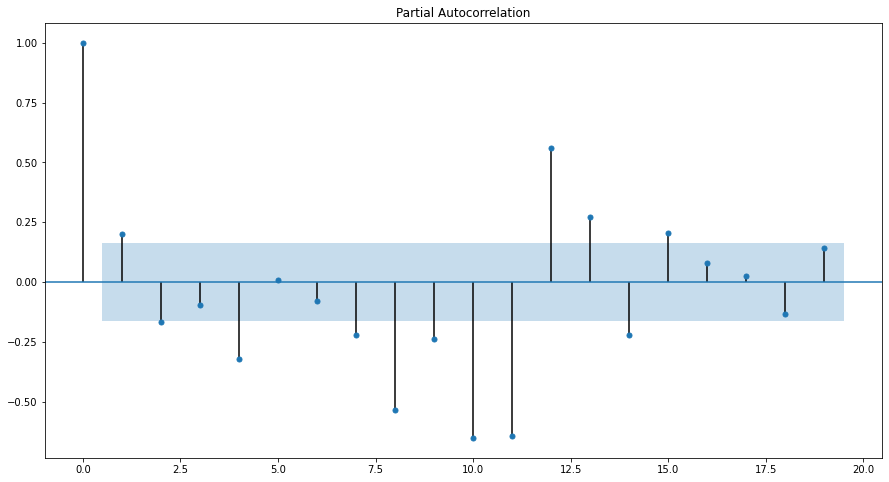

In [17]:
plot_pacf(df_diff, lags = range(0, 20))
plt.show()

from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


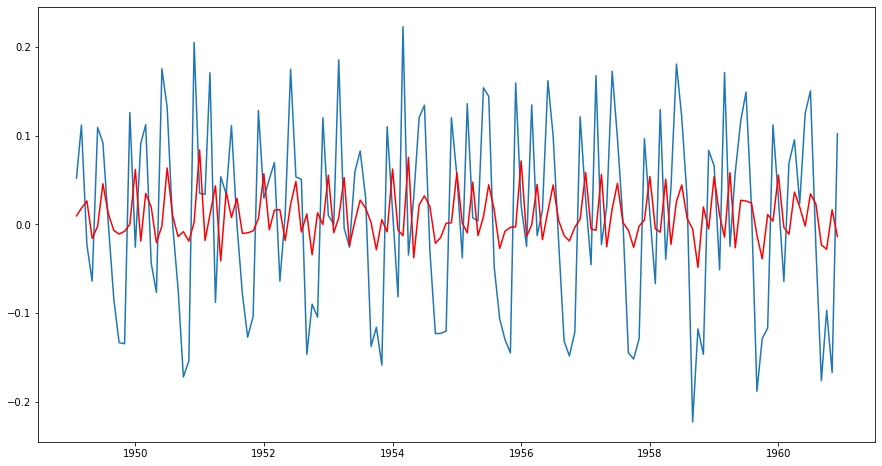

In [18]:
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


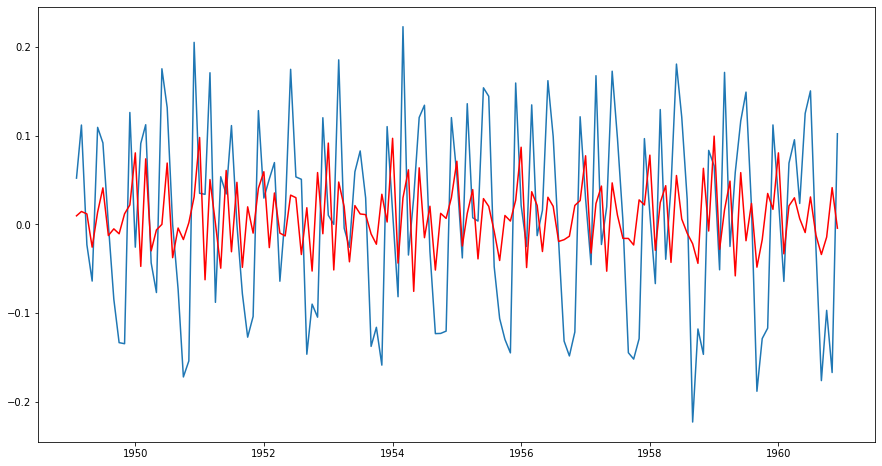

In [19]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


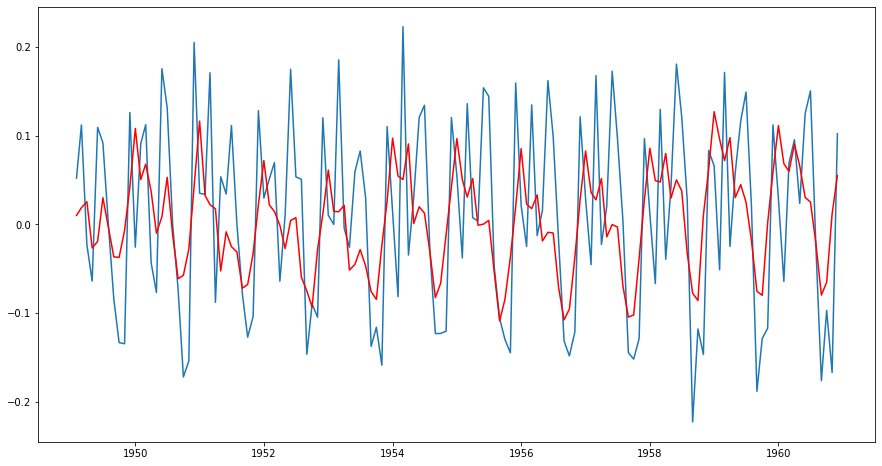

In [22]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

In [23]:
from fbprophet import Prophet
df_pred = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df_pred['Month']= pd.to_datetime(df_pred['Month'])
df_pred = df_pred.rename(columns={"Month": "ds", "Passengers": "y"})
df_pred.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [24]:
model = Prophet()
model.fit(df_pred)
future = model.make_future_dataframe(periods = 10, freq = 'M')
forecast = model.predict(future)
forecast.head()


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,56.620521,112.863467,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,50.039918,108.190645,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,81.600113,138.766005,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,79.806619,135.317324,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,81.359365,142.403232,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


In [63]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.637236,55.005614,113.465244,106.583811,106.583811,106.583811
1,1949-02-01,78.052782,48.277762,106.260569,108.760063,108.760063,108.760063
2,1949-03-01,110.256234,82.636768,139.546929,110.725710,110.725710,110.725710
3,1949-04-01,107.735292,79.091453,135.777870,112.901962,112.901962,112.901962
4,1949-05-01,111.242092,83.882213,140.372101,115.008012,115.008012,115.008012
...,...,...,...,...,...,...,...
149,1961-05-31,534.096416,505.373859,563.732641,502.595979,502.454206,502.787464
150,1961-06-30,577.075507,549.686327,605.581949,505.609760,505.408306,505.867374
151,1961-07-31,575.488641,544.349396,603.957146,508.724000,508.469154,509.062719
152,1961-08-31,529.004080,501.390454,558.907199,511.838239,511.527754,512.252166


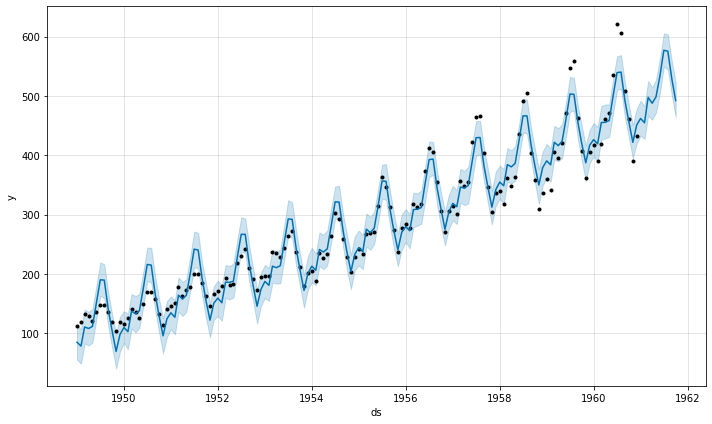

In [64]:
model.plot(forecast)
plt.show()